# Md. Touhidur Rahman - 2011873042

# 2(b)

In [8]:
#import library function
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

## Vector Representation of Filter

In [9]:
# Given filter F
F = np.array([1, 1, 1, 0, 0, 0, -1, -1, -1])
# Flatten the filter
F_flat = F.flatten()

## Vector Representation of the Neighborhood Patch

In [10]:
# Given image I' which is maintaining zero-padding
image_patch = np.array([
    [0, 0, 0, 0, 0],
    [0, 7, 4, 1, 0],
    [0, 8, 5, 2, 0],
    [0, 9, 6, 3, 0],
    [0, 0, 0, 0, 0]
])


In [11]:
# Initialize a matrix to store correlation results
correlation_matrix = np.zeros((3, 3))

## Calculate correlation for every valid position
###        Extract the neighborhood patch at position (i, j)
###       Flatten the neighborhood patch and calculate the dot product

In [12]:
for i in range(1, 4):
    for j in range(1, 4):

        neighborhood_patch = image_patch[i - 1:i + 2, j - 1:j + 2]
        correlation_matrix[i - 1, j - 1] = np.dot(F_flat, neighborhood_patch.flatten())

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
[[-13. -15.  -7.]
 [ -4.  -6.  -4.]
 [ 13.  15.   7.]]


# Test code using the provided image and the filters.

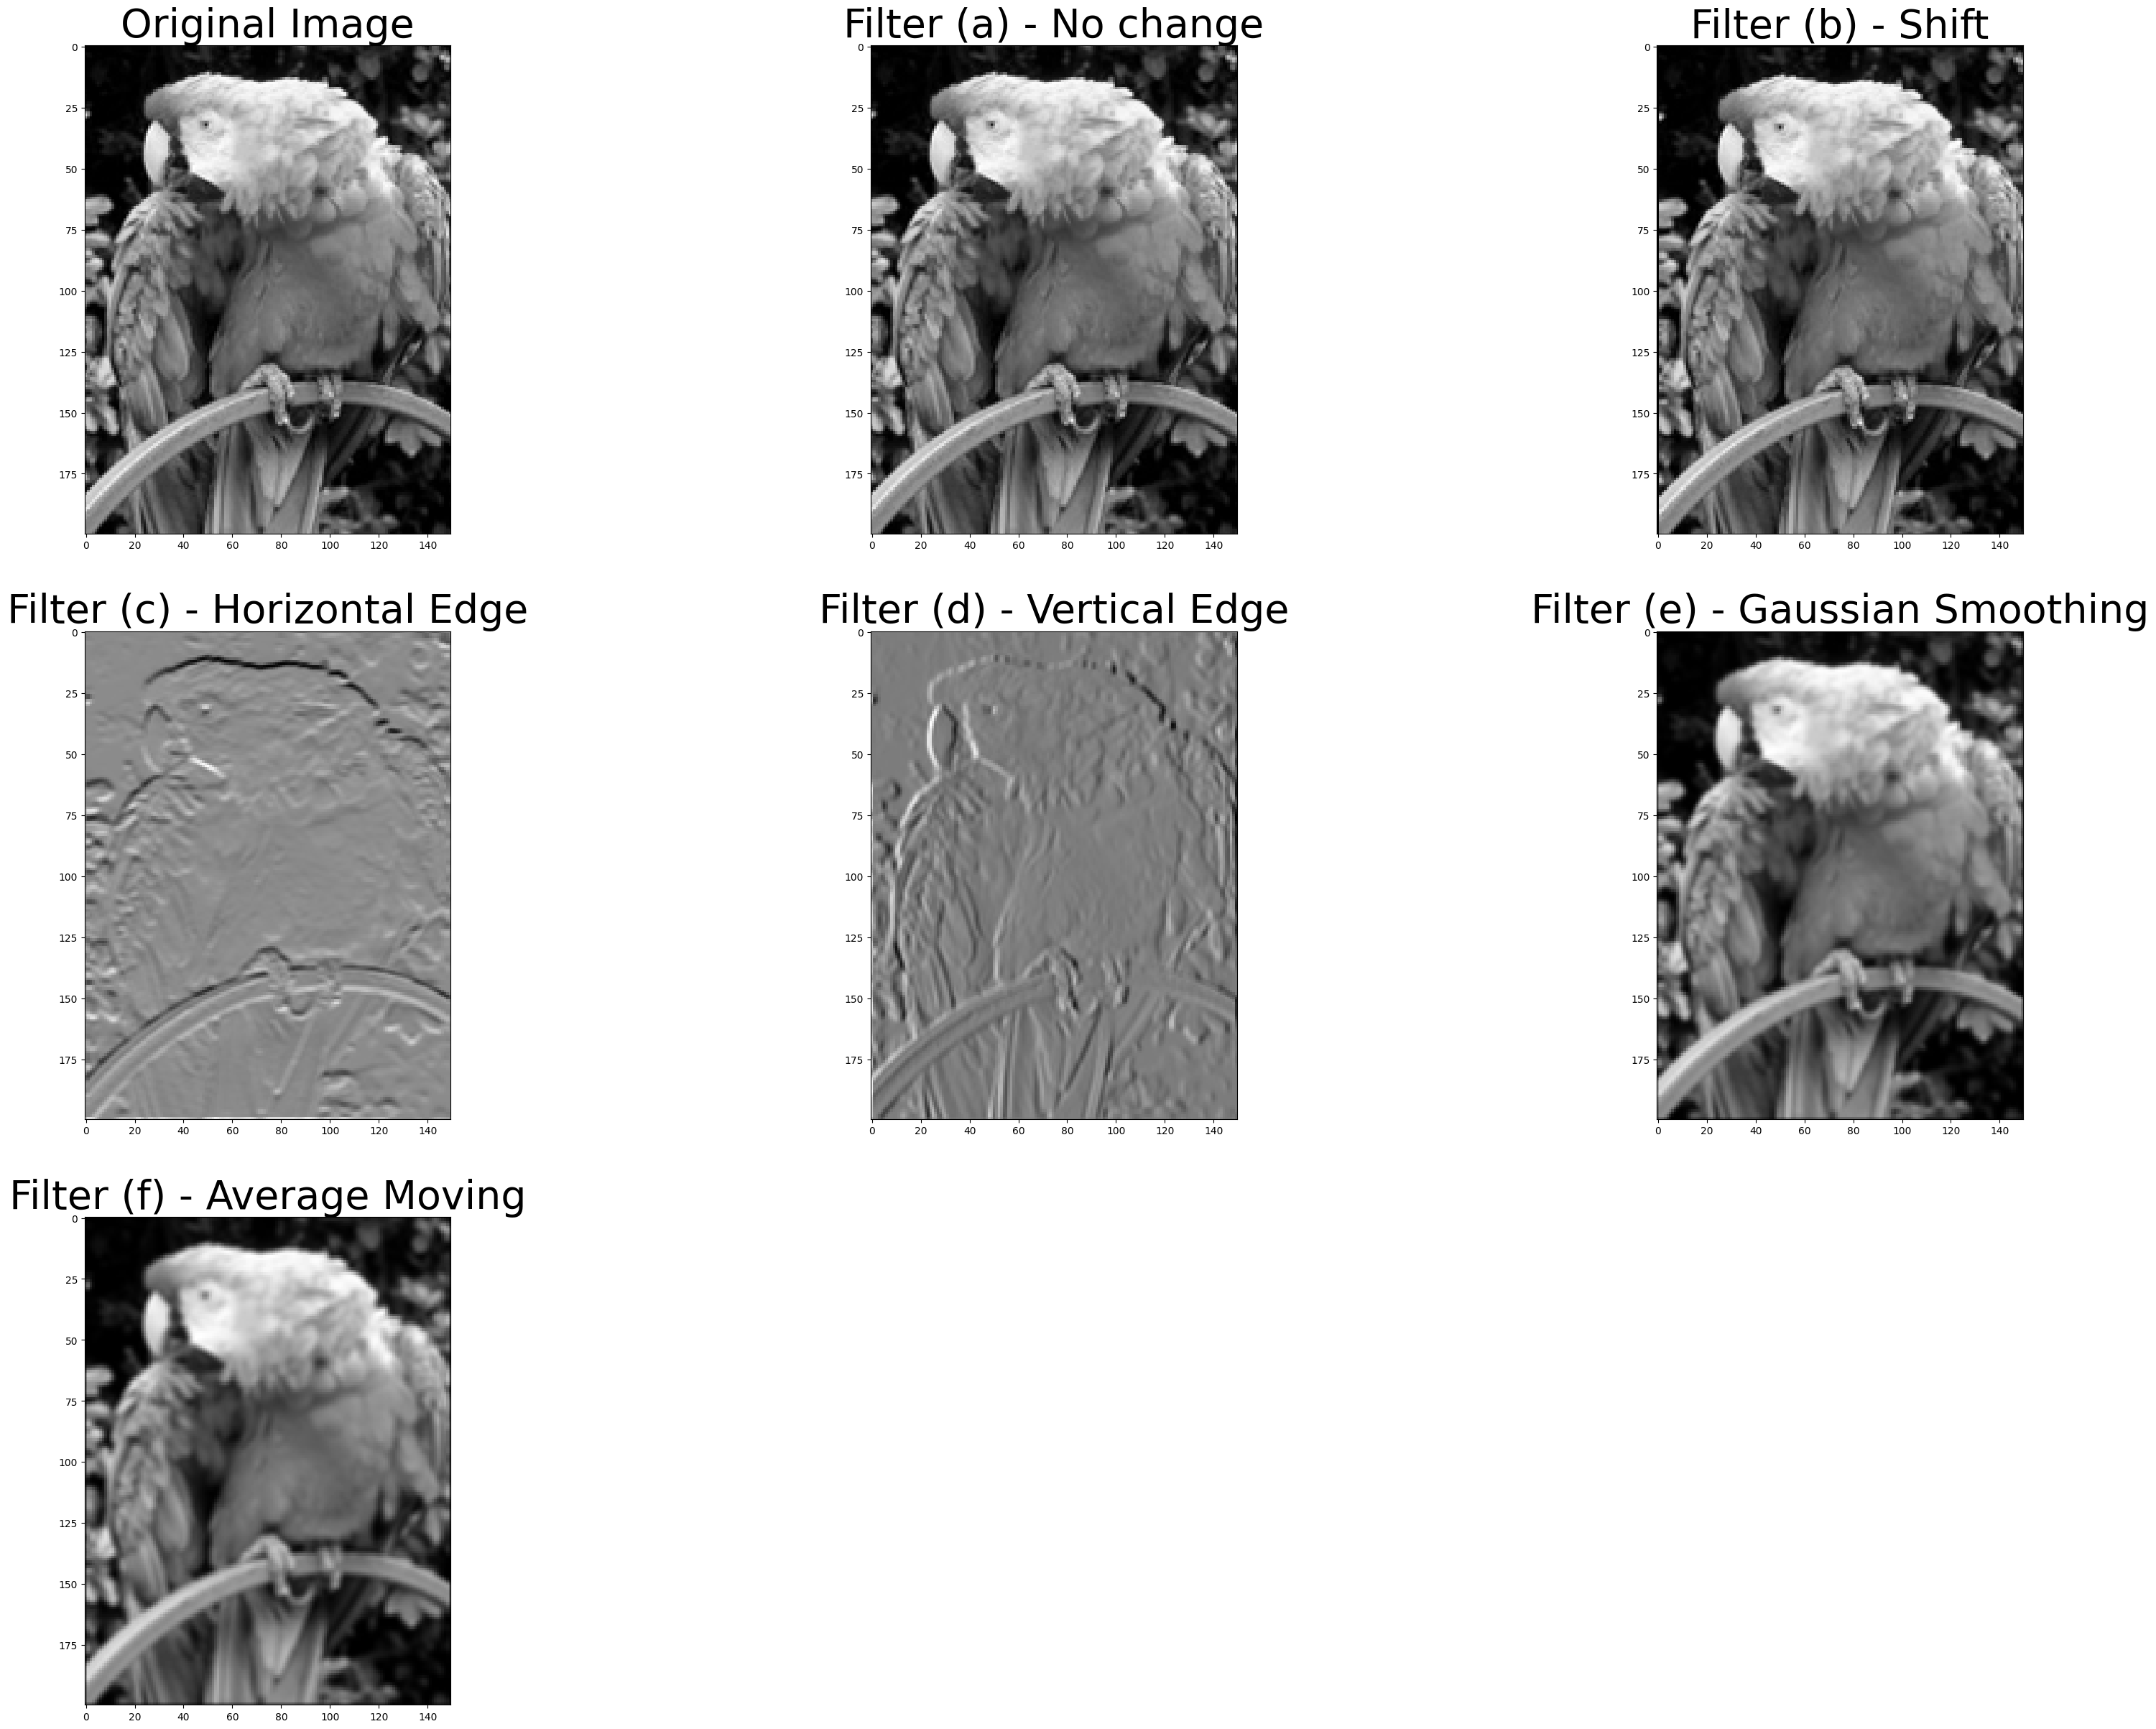

In [7]:

def correlation_filter_image_dot_product(F, I):
    # implement zero-padding to maintain correct sizes
    padded_I = np.pad(I, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    # reshape filter F to a column vector
    f = F.flatten()

    # extract patches from the image using array slicing
    patches = np.lib.stride_tricks.sliding_window_view(padded_I, (3, 3))

    # reshape patches to 1D arrays
    patches_1d = patches.reshape(-1, 9)

    # computing G(i,j) for all patches using dot product
    G = np.dot(patches_1d, f)

    # reshape G to the original image shape
    G = G.reshape(I.shape)

    return G

# Load the image
image_path = 'parrot.png'
image = io.imread(image_path)

# Define filters
a = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
b = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
c = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
d = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
e = (1/16) * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
f = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Filter a
result_a = correlation_filter_image_dot_product(a, image)
# Filter b
result_b = correlation_filter_image_dot_product(b, image)
# Filter c
result_c = correlation_filter_image_dot_product(c, image)
# Filter d
result_d = correlation_filter_image_dot_product(d, image)
# Filter e
result_e = correlation_filter_image_dot_product(e, image)
# Filter f
result_f = correlation_filter_image_dot_product(f, image)
# Display original image and the results for all filters

plt.figure(figsize=(40, 30))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize = 40)

plt.subplot(3, 3, 2)
plt.imshow(result_a, cmap='gray')
plt.title('Filter (a) - No change', fontsize = 40)

plt.subplot(3, 3, 3)
plt.imshow(result_b, cmap='gray')
plt.title('Filter (b) - Shift', fontsize = 40)

plt.subplot(3, 3, 4)
plt.imshow(result_c, cmap='gray')
plt.title('Filter (c) - Horizontal Edge', fontsize = 40)

plt.subplot(3, 3, 5)
plt.imshow(result_d, cmap='gray')
plt.title('Filter (d) - Vertical Edge', fontsize = 40)

plt.subplot(3, 3, 6)
plt.imshow(result_e, cmap='gray')
plt.title('Filter (e) - Gaussian Smoothing', fontsize = 40)

plt.subplot(3, 3, 7)
plt.imshow(result_f, cmap='gray')
plt.title('Filter (f) - Average Moving', fontsize = 40)

plt.show()